In [1]:
from google.colab import files
uploaded=files.upload()

Saving netflix_titles.csv to netflix_titles.csv


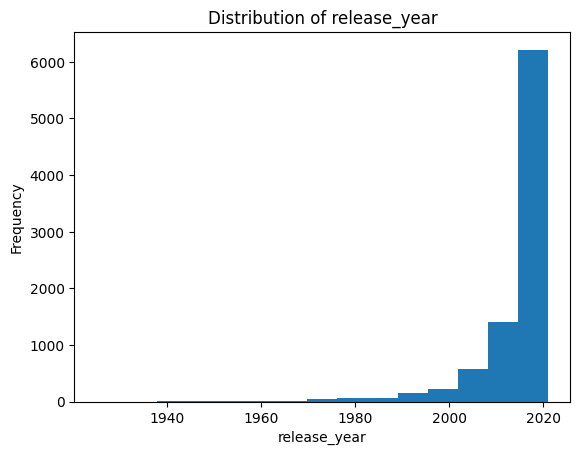

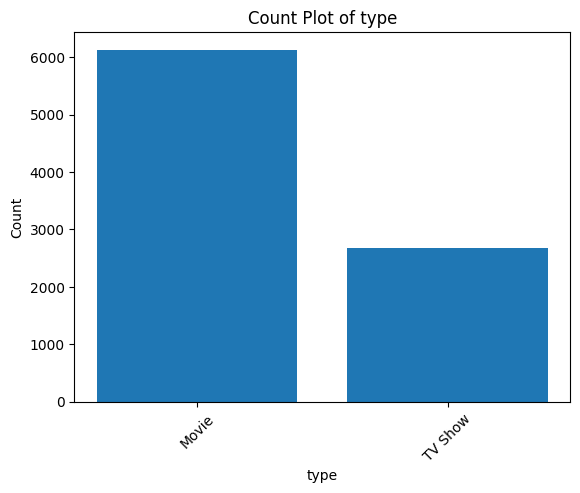

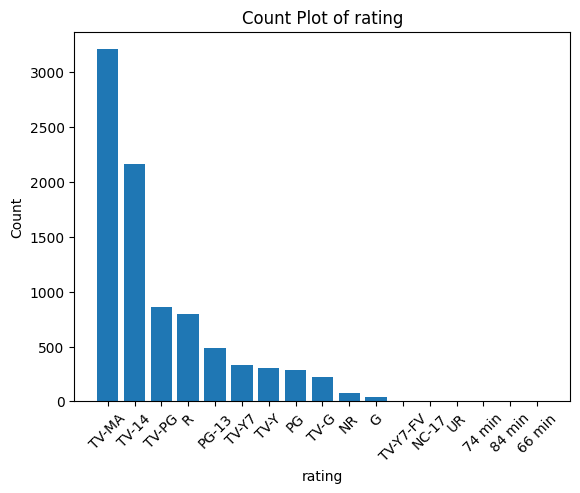

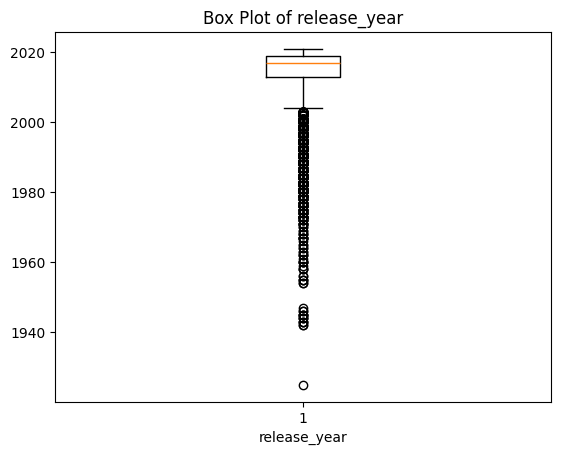

Not enough numerical features for correlation heatmap.
Feature importance based on correlation:

release_year    0.18171
Name: type_encoded, dtype: float64

Summary:
- Netflix dataset is dominated by categorical features.
- Release year is the main numerical feature.
- Movies are more frequent than TV Shows.
- Dataset is suitable for classification with proper encoding.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("netflix_titles.csv")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=15)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()
categorical_cols = ['type', 'rating']

for col in categorical_cols:
    counts = df[col].value_counts()
    plt.figure()
    plt.bar(counts.index, counts.values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()
for col in numerical_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.xlabel(col)
    plt.title(f"Box Plot of {col}")
    plt.show()
if len(numerical_cols) > 1:
    corr = df[numerical_cols].corr()
    plt.figure()
    plt.imshow(corr)
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title("Correlation Heatmap of Numerical Features")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numerical features for correlation heatmap.")
df['type_encoded'] = df['type'].astype('category').cat.codes

if len(numerical_cols) > 0:
    corr_target = df[numerical_cols.tolist() + ['type_encoded']].corr()
    feature_importance = corr_target['type_encoded'] \
                          .drop('type_encoded') \
                          .sort_values(ascending=False)

    print("Feature importance based on correlation:\n")
    print(feature_importance)
else:
    print("No numerical features available for feature importance.")
print("\nSummary:")
print("- Netflix dataset is dominated by categorical features.")
print("- Release year is the main numerical feature.")
print("- Movies are more frequent than TV Shows.")
print("- Dataset is suitable for classification with proper encoding.")
